# Project Title - Zomato in Hyderabad- Restaurants and Reviews

This dataset deals with the restaurants of Hyderabad those come under ZOMATO,a food delivery App and their services. Vistiors, other reviewers share their experiences with these restaurants in the app itself that will help other people to choose the restaurant on basis of their preferences and help the owners of the restaurants also to analyze their business.  
The story also tells about the unique food culture and cuisines of Hyderabad. This place has a very balanced segmentation when it comes to food and drinks, both cosmopolitan (Italian, Chinese, North Indian) and heritage (mouth watering and ears burning biryanis). 

Numpy,Pandas,Matplotlib,Seaborn these libraries are used. 


## Importing and Data Loading -
There are two separate files, while the columns are self explanatory. Below is a brief description:

**Restaurant names and Metadata** - This could help in clustering the restaurants into segments. Also the data has valuable information around timing,cuisine and costing.

**Restaurant reviews** - This shows the rating andreviews of the restaurants. This also helps to find out the critics in the industry.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import opendatasets as od
import re
import string
from wordcloud import WordCloud, STOPWORDS
from cleantext import clean
%matplotlib inline

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [2]:
data_URL='https://www.kaggle.com/datasets/batjoker/zomato-restaurants-hyderabad'
data_download=od.download(data_URL)

Skipping, found downloaded files in ".\zomato-restaurants-hyderabad" (use force=True to force download)


In [3]:
data_dir='./zomato-restaurants-hyderabad'

In [4]:
os.listdir(data_dir)

['Restaurant names and Metadata.csv', 'Restaurant reviews.csv']

In [5]:
reviews_df=pd.read_csv('./zomato-restaurants-hyderabad/Restaurant reviews.csv')

In [6]:
restaurant_df=pd.read_csv('./zomato-restaurants-hyderabad/Restaurant names and Metadata.csv')

In [7]:
reviews_df_copy=reviews_df[['Restaurant','Reviewer','Review','Rating','Metadata','Pictures']].copy()
restaurant_df_copy=restaurant_df[['Name','Cost','Collections','Cuisines','Timings']].copy()

## Data Cleaning - 
Here the created data frames are being formatted in required formats. Unwanted data are removed. Null values are handled.

In [8]:
reviews_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Pictures    10000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 468.9+ KB


In [9]:
#remove the null data
reviews_df_copy.dropna(how='any',inplace=True)

In [10]:
#null data is removed
reviews_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Pictures    9955 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 544.4+ KB


In [11]:
reviews_df_copy.sample(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures
3690,Banana Leaf Multicuisine Restaurant,Sampath,delicious,5,"1 Review , 1 Follower",0
2393,Amul,Santosh Kumar Dhal,one order was supposed to be a thick shake but...,1,"5 Reviews , 8 Followers",0


In [12]:
reviews_df_copy['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [13]:
#the type of the rating was object. It's not supposed to be an object. while checking this one item 'Like' has been found. 
#It's decided to fill it with the mean value of the other ratings.
like=reviews_df_copy['Rating'][reviews_df_copy['Rating']!= 'Like']
s=0
for i in list(like):
    s=s+float(i)
value=str(round(s/len(list(like)),1))
reviews_df_copy['Rating'][reviews_df_copy['Rating']== 'Like'] =value

C:\Users\DIMPI\AppData\Local\Temp\ipykernel_1892\3475113572.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df_copy['Rating'][reviews_df_copy['Rating']== 'Like'] =value


In [14]:
#type has been converted into float
reviews_df_copy['Rating'] = reviews_df_copy['Rating'].astype('float')

In [15]:
#to varify the type of rating
reviews_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9955 non-null   object 
 1   Reviewer    9955 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9955 non-null   float64
 4   Metadata    9955 non-null   object 
 5   Pictures    9955 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 544.4+ KB


In [16]:
restaurant_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Cost         105 non-null    object
 2   Collections  51 non-null     object
 3   Cuisines     105 non-null    object
 4   Timings      104 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


In [17]:
#filling the null values
restaurant_df_copy.fillna('Not listed in collections',inplace= True)

In [18]:
restaurant_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Cost         105 non-null    object
 2   Collections  105 non-null    object
 3   Cuisines     105 non-null    object
 4   Timings      105 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


In [19]:
restaurant_df_copy.sample(2)

,Name,Cost,Collections,Cuisines,Timings
83,GD's,500,Not listed in collections,"Burger, American",11:30 AM to 5 AM
14,AB's - Absolute Barbecues,"1,500","Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM"


In [20]:
#removal comma from the cost
cost=[]
for i in range(len(list(restaurant_df_copy['Cost']))):
    if list(restaurant_df_copy['Cost'])[i].find(',') == -1:
        cost.append(list(restaurant_df_copy['Cost'])[i])
    else:
        cost.append(list(restaurant_df_copy['Cost'])[i].split()[0].replace(',',''))                
costseries=cost 

In [21]:
restaurant_df_copy['Cost']=costseries

In [22]:
#setting the type of cost as float
restaurant_df_copy['Cost']=restaurant_df_copy['Cost'].astype('float')

In [23]:
#verifying the cost
restaurant_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         105 non-null    object 
 1   Cost         105 non-null    float64
 2   Collections  105 non-null    object 
 3   Cuisines     105 non-null    object 
 4   Timings      105 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.2+ KB


In [24]:
restaurant_df_copy['Cost'].unique()

array([ 800., 1300., 1200., 1500.,  500.,  300., 1000.,  350.,  400.,
       1600.,  750.,  550., 1900.,  450.,  150., 1400., 1100.,  600.,
        200.,  900.,  700., 1700., 2500.,  850.,  650., 1800., 2800.,
       1750.,  250.])

## Data Analysis -
By analyzing the data tried to figure out the relations, make them simplified and find out the answers.

In [25]:
cuisine_list=[]
inner_cuisine_list=[]
final_cuisine_list=[]
cuisine_list_dummy=list(restaurant_df_copy['Cuisines'])
for each in range(len(cuisine_list_dummy)):
    each_list=cuisine_list_dummy[each].split(',')
    cuisine_list.append(each_list)
    for j in range(len(cuisine_list)):
        for k in cuisine_list[j]:
            inner_cuisine_list.append(k.strip())
final_cuisine_list=list(set(inner_cuisine_list))
final_cuisine_list.sort()

### Top 5 high priced restaurants and Top 5 low priced restaurants 

Here are list of 5 most expensive restaurants in the city where the highest per head price is more than 2500
Here are list of 5 least expensive restaurants in the city where the lowest per head price is less than 200

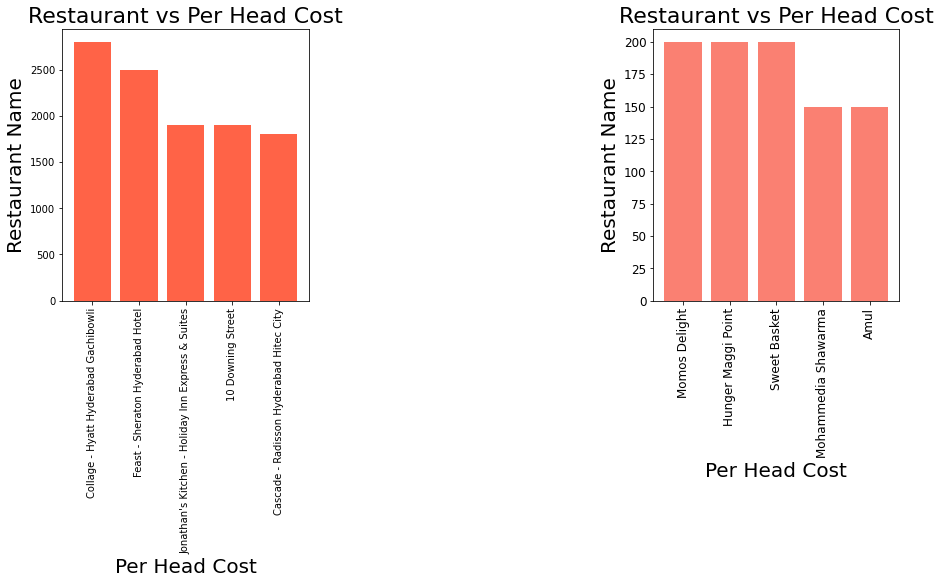

In [26]:
s=restaurant_df_copy.sort_values('Cost', ascending= False).head(5)[['Name','Cost']]
h=restaurant_df_copy.sort_values('Cost', ascending= False).tail(5)[['Name','Cost']]
x=s['Name']
y=s['Cost']
xx=h['Name']
yy=h['Cost']
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
plt.xticks(rotation=90)
plt.ylabel("Restaurant Name", size = 20)
plt.xlabel("Per Head Cost", size = 20)
plt.bar(x,y,color='tomato')
plt.rcParams['font.size'] = 12
plt.title("Restaurant vs Per Head Cost", size = 22)


plt.subplot(1,3,3)
plt.xticks(rotation=90)
plt.bar(xx,yy,color='salmon')
plt.ylabel("Restaurant Name", size = 20)
plt.xlabel("Per Head Cost", size = 20)
plt.rcParams['font.size'] = 12
plt.title("Restaurant vs Per Head Cost", size = 22)
plt.show()

### Average per head cost of a restaurant

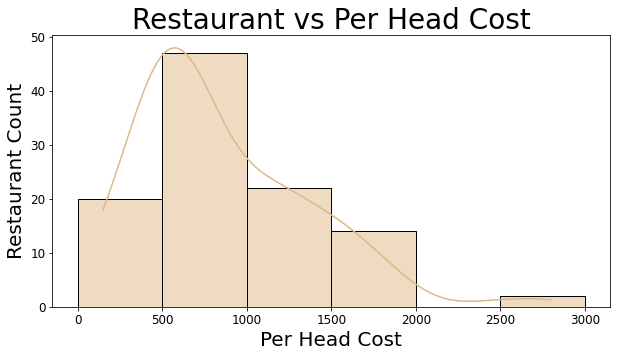

In [27]:
x=restaurant_df_copy['Cost']
plt.figure(figsize = (10, 5))
sns.histplot(x,binwidth=500, binrange=(0,3000),kde=True,color='burlywood')
plt.ylabel("Restaurant Count", size = 20)
plt.xlabel("Per Head Cost", size = 20)
plt.title("Restaurant vs Per Head Cost", size = 28)
plt.show()

Out of 105 restaurants most of the restaurants have an expense between 500-1000. And this count of restaurant is approximately 47.Just only few restaurants fall under expensive restaurants. This count is approximately 3.

###  Restaurants and the count of available cuisines

In [28]:
cuisineCountList=[]
cuisineList=list(restaurant_df_copy['Cuisines'])
for i in range(len(cuisineList)):
    cuisineCount=cuisineList[i].split(',')
    cuisineCountList.append(len(cuisineCount))                           
restaurant_df_copy['CuisinesCount']=cuisineCountList
restaurant_df_copy.sample(3)

,Name,Cost,Collections,Cuisines,Timings,CuisinesCount
71,Eat India Company,1300.0,Not listed in collections,"North Indian, Mughlai, Beverages","12 Noon to 3 PM, 7 PM to 11 PM",3
44,La La Land - Bar & Kitchen,1000.0,"Great Buffets, Trending This Week","Finger Food, North Indian, Kebab, Chinese",12 Noon to 11:30 PM,4
18,10 Downing Street,1900.0,Trending This Week,"North Indian, Chinese, Continental",12 Noon to 12 Midnight,3


### A - Restaurants having cuisines more than 5

In [29]:
highestCuisinesDF=restaurant_df_copy[['Name','CuisinesCount','Cost']][restaurant_df_copy['CuisinesCount'] >= 5].sort_values(['CuisinesCount','Cost'],ascending=False)
highestCuisinesDF

,Name,CuisinesCount,Cost
0,Beyond Flavours,6,800.0
92,Collage - Hyatt Hyderabad Gachibowli,5,2800.0
21,Jonathan's Kitchen - Holiday Inn Express & Suites,5,1900.0
5,The Fisherman's Wharf,5,1500.0
26,Mustang Terrace Lounge,5,1300.0
4,Over The Moon Brew Company,5,1200.0
70,Urban Asia - Kitchen & Bar,5,1100.0
8,Hyper Local,5,1000.0
31,Pista House,5,1000.0
3,Shah Ghouse Hotel & Restaurant,5,800.0


So there is only 1 restaurant providing 6 different types of cuisine, 12 restaurants providing 5 different types of cuisine. We can compare the restaurant based on the count of available cuisines and per head cost.

### B - Top 10 restaurants based on average rating 

In [30]:
avrRating=reviews_df_copy.groupby(['Restaurant'])[['Restaurant','Rating']].mean().sort_values('Rating',ascending=False)
avrRating.head(10)

,Rating
Restaurant,
AB's - Absolute Barbecues,4.88
B-Dubs,4.81
"3B's - Buddies, Bar & Barbecue",4.76
Paradise,4.70
Flechazo,4.66
The Indi Grill,4.60
Zega - Sheraton Hyderabad Hotel,4.45
Over The Moon Brew Company,4.34
Beyond Flavours,4.28


So **"AB's - Absolute Barbecues"** has the highest average rating. 6 top restaurants have average rating more than 4.5

### Combining A and B 

In [31]:
def merging_two_dfs(df,val):
    resList=[]
    ratingList=[]
    for i in range(len(df)):
        for n in range(len(avrRating.index)):
            if df[i]==avrRating.index[n]:
                if val:
                    resList.append(df[i])
                ratingList.append(str(avrRating.iloc[n]['Rating']))
    return resList,ratingList   

In [32]:
highestCuisineDFToList=list(highestCuisinesDF['Name'])
result=merging_two_dfs(highestCuisineDFToList,1)
costList=list(highestCuisinesDF['Cost'])
cuisinesList=list(highestCuisinesDF['CuisinesCount'])
newMergedDF=pd.DataFrame(list(zip(result[0],result[1],costList,cuisinesList)),columns=['Name','Rating','Cost','CuisinesList'])
newMergedDF

,Name,Rating,Cost,CuisinesList
0,Beyond Flavours,4.28,800.0,6
1,Collage - Hyatt Hyderabad Gachibowli,3.41,2800.0,5
2,Jonathan's Kitchen - Holiday Inn Express & Suites,3.535,1900.0,5
3,The Fisherman's Wharf,4.22,1500.0,5
4,Mustang Terrace Lounge,3.31,1300.0,5
5,Over The Moon Brew Company,4.34,1200.0,5
6,Urban Asia - Kitchen & Bar,3.65,1100.0,5
7,Hyper Local,3.64,1000.0,5
8,Pista House,3.23,1000.0,5
9,Shah Ghouse Hotel & Restaurant,3.21,800.0,5


So from the above table we can say that from all the perspectives **'Beyond Flavours'** is the best choice as it serves 6 cuisines with minimum cost of 800 and with the rating of more than 4. The second next choice can be **'Banana Leaf Multicuisine Restaurant'** as it provides 5 different cuisines with again a lower cost of 700 and rating 3.69.

### Top reviewers who made highest number of reviews

In [33]:
#segregate the review count and the no of followers of the critics
reviewList=[]
followerList=[]
metadataList=list(reviews_df_copy['Metadata'])
for i in range(len(metadataList)):
    if metadataList[i].find(',') == -1:
        reviewList.append(int(metadataList[i].split(' ')[0]))
        followerList.append(0)
    else:
        separate= metadataList[i].split(',')
        reviewList.append(int(separate[0].split(' ')[0]))
        followerList.append(int(separate[1].split(' ')[1]))  
    
reviews_df_copy['ReviewCount']= reviewList
reviews_df_copy['FollowerCount']=followerList
reviews_df_copy.sample()

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures,ReviewCount,FollowerCount
1191,Barbeque Nation,Deepthi,Barbeque’s are famous for their huge spread in...,3.0,"19 Reviews , 9 Followers",0,19,9


In [34]:
# in this df there are duplicate values of reviewers
reviewers_dummy=reviews_df_copy.drop_duplicates(subset='Reviewer',keep='first')[['Reviewer','ReviewCount']].sort_values('ReviewCount',ascending=False).head(10)
reviewers_dummy.sample()

,Reviewer,ReviewCount
3124,Anvesh Chowdary,1031


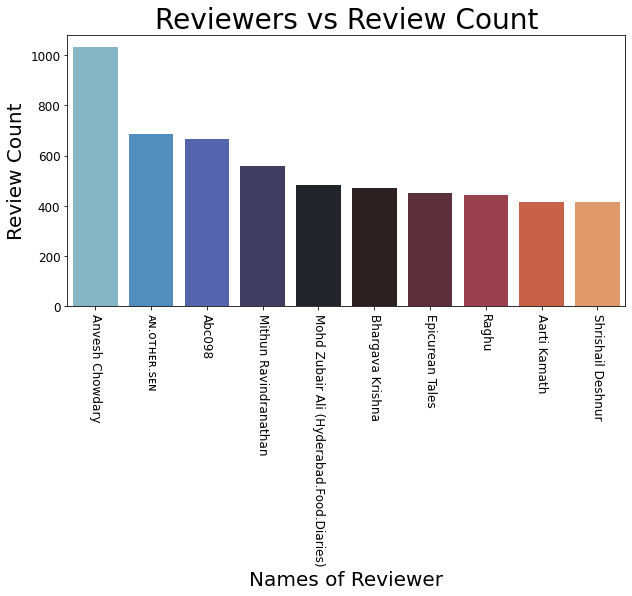

In [35]:
x=reviewers_dummy['Reviewer']
y=reviewers_dummy['ReviewCount']
plt.figure(figsize = (10, 5))
plt.xticks(rotation=-90)
sns.barplot(x=x,y=y,palette="icefire")
plt.ylabel("Review Count", size = 20)
plt.xlabel("Names of Reviewer", size = 20)
plt.title("Reviewers vs Review Count", size = 28)
plt.show()

So among all **Anvesh Chowdary** reviewed the maximum restaurants

### Top reviewers with highest number of followers

In [36]:
followers_dummy=reviews_df_copy.drop_duplicates(subset='Reviewer',keep='first')[['Reviewer','FollowerCount']].sort_values('FollowerCount',ascending=False).head(10)
followers_dummy.sample()

,Reviewer,FollowerCount
4820,FooD HUNTer,5715


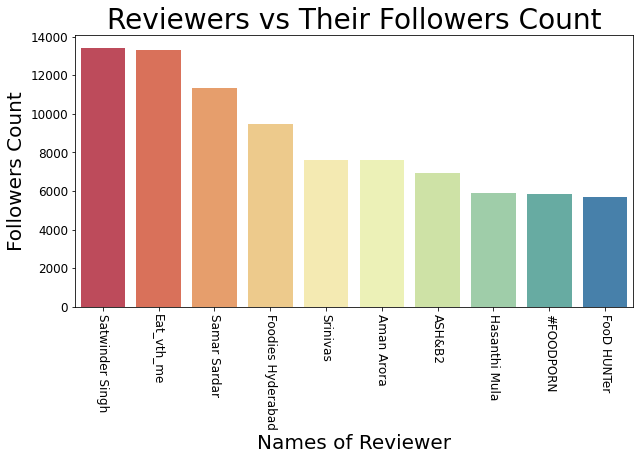

In [37]:
x=followers_dummy['Reviewer']
y=followers_dummy['FollowerCount']
plt.figure(figsize = (10, 5))
plt.xticks(rotation=-90)
sns.barplot(x=x,y=y,palette="Spectral")
plt.ylabel("Followers Count", size = 20)
plt.xlabel("Names of Reviewer", size = 20)
plt.title("Reviewers vs Their Followers Count", size = 28)
plt.show()

So among all **Satwinder Singh** has the maximum followers.

### Merging two data frames
From the list below one can easily compare the factors like available cuisines, per head cost, timings and average rating and choose a restaurant 

In [39]:
restaurant_df_copy_new = restaurant_df_copy.copy()
restaurantDFToList=list(restaurant_df_copy_new['Name'])
result=merging_two_dfs(restaurantDFToList,0)


restaurant_df_copy_new["Cuisines"] = restaurant_df_copy_new["Cuisines"].str.split(",")
restaurant_df_copy_new["AvgRating"]=pd.Series(result[1])
restaurant_df_copy_new['AvgRating'].fillna(0,inplace=True)
restaurant_df_copy_new['CuisinesCount']=restaurant_df_copy_new['Cuisines'].apply(lambda d: len(d))
restaurant_df_copy_new

pd.set_option('display.max_colwidth',1000)

restaurant_df_copy_new[['Name','CuisinesCount',"Cuisines",'Cost','Timings','AvgRating']].head(3)

,Name,CuisinesCount,Cuisines,Cost,Timings,AvgRating
0,Beyond Flavours,6,"[Chinese, Continental, Kebab, European, South Indian, North Indian]",800.0,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",4.28
1,Paradise,3,"[Biryani, North Indian, Chinese]",800.0,11 AM to 11 PM,4.7
2,Flechazo,4,"[Asian, Mediterranean, North Indian, Desserts]",1300.0,"11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4.66


### Most popular cuisines

In [40]:
for index, row in restaurant_df_copy_new.iterrows():
    for genre in row["Cuisines"]:
        restaurant_df_copy_new.at[index,genre.strip()] = 1
#Filling in the NaN values with 0 to show that a cuisine doesn't have that NaN 
restaurant_df_copy_new = restaurant_df_copy_new.fillna(0)
restaurant_df_copy_new.sort_values(by='CuisinesCount',ascending=False).head(2)

,Name,Cost,Collections,Cuisines,Timings,CuisinesCount,AvgRating,Chinese,Continental,Kebab,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,Beyond Flavours,800.0,"Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings","[Chinese, Continental, Kebab, European, South Indian, North Indian]","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,4.28,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,Banana Leaf Multicuisine Restaurant,700.0,Great Buffets,"[Biryani, South Indian, North Indian, Chinese, Andhra]","12:30 PM to 3:30 PM, 7 PM to 10:40 PM",5,3.69,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
dictionary={}
for n in range(len(final_cuisine_list)):
    dictionary[final_cuisine_list[n]] =[]
    
for n in range(len(final_cuisine_list)):
    for index, row in restaurant_df_copy_new.iterrows():
        if restaurant_df_copy_new.loc[index][final_cuisine_list[n]] !=0:
            dictionary[final_cuisine_list[n]].append(restaurant_df_copy_new.loc[index]['Name'])       


In [42]:
cuisinesCountList=[]
for n in range(len(final_cuisine_list)):
    cuisinesCountList.append(len(dictionary[final_cuisine_list[n]]))

In [43]:
mostAvailableCuisineDF=pd.DataFrame(list(zip(final_cuisine_list, cuisinesCountList)),
               columns =['Name', 'Count'])

In [44]:
mostAvailableCuisineDF.sort_values('Count',ascending=False).sample()

,Name,Count
41,Sushi,4


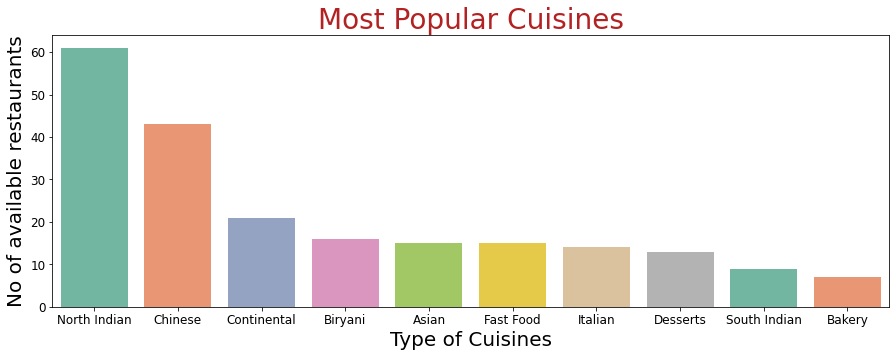

In [45]:
sg=mostAvailableCuisineDF.sort_values('Count',ascending=False).head(10)
x=sg['Name']
y=sg['Count']
plt.figure(figsize = (15, 5))
sns.barplot(y=sg['Count'],x=sg['Name'],palette="Set2")
sns.color_palette("Set2")
plt.ylabel("No of available restaurants", size = 20)
plt.xlabel("Type of Cuisines", size = 20)
plt.title("Most Popular Cuisines", size = 28,color='firebrick')
plt.rcParams['font.size'] = 15.0
plt.show()

So **North Indian** cuisine is the most popular cuisines that's why it's the most available one also. The second one is **Chinese**.

### Reviews with pictures and no pictures

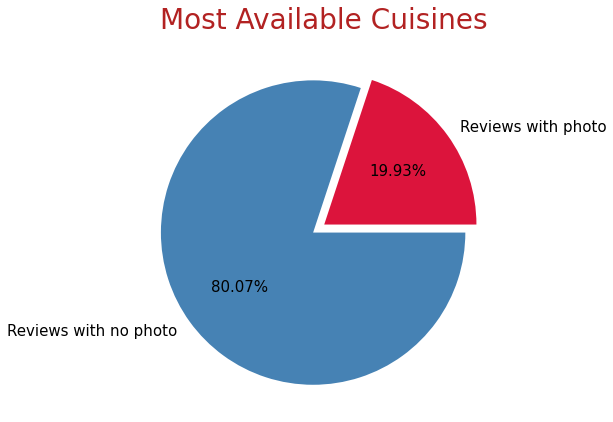

In [46]:
yesPic=reviews_df_copy[reviews_df_copy['Pictures'] !=0]['Pictures'].count()
noPic=reviews_df_copy[reviews_df_copy['Pictures'] ==0]['Pictures'].count()
totalCount=reviews_df_copy['Pictures'].count()
label=['Reviews with photo','Reviews with no photo']
color=['crimson','steelblue']
explode=[0,0.09]
plt.figure(figsize = (15, 7))
plt.rcParams['font.size'] = 15.0
plt.pie([yesPic,noPic],labels=label,autopct='%1.2f%%',colors=color,explode=explode)
plt.title("Reviews with photo and with no photo", size = 28,color='firebrick')
plt.show()

Out of all reviews only 20% reviews were made with photos.

### Most used words in the reviews

In [47]:
#removing punctuation
punctuations_list = string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

reviews_df_copy['Review'] = reviews_df_copy['Review'].apply(lambda x: cleaning_punctuations(x))

In [48]:
#removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

reviews_df_copy['Review'] = reviews_df_copy['Review'].apply(lambda x: cleaning_repeating_char(x))

In [49]:
#removing numericals
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

reviews_df_copy['Review'] = reviews_df_copy['Review'].apply(lambda x: cleaning_numbers(x))

In [50]:
#removing emojis
x=list(reviews_df_copy['Review'])
stringAll = ''.join(x)
stringAllTogether=stringAll.replace('\n', '')
longText=clean(stringAllTogether, no_emoji=True)

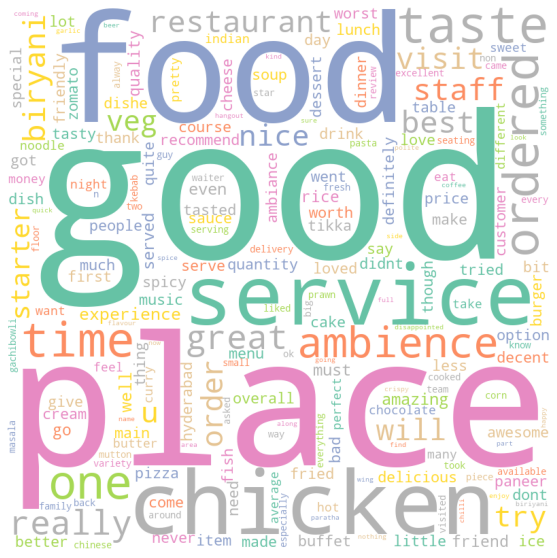

In [51]:
wordcloud = WordCloud(width = 800, height = 800, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(longText)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud) 
plt.axis("off");

So most used words are **Good**, **Place**, **Food**, **Service**, **Chicken**, **Taste**, **Ambience** etc
